In [4]:
#出生率資料
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   374k      0 --:--:-- --:--:-- --:--:--  374k


In [5]:
import numpy as np
import pandas as pd
births = pd.read_csv('births.csv')

In [8]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [66]:
decade = 10 * (births['year'] // 10)
births.groupby([decade, 'gender'])['births'].sum().unstack()

gender,F,M
year,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


In [67]:
births.pivot_table('births', index=decade, columns='gender', aggfunc=sum)

gender,F,M
year,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0, 0.5, 'total births per year')

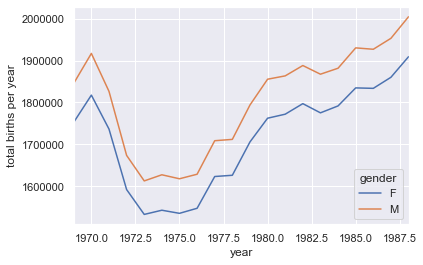

In [69]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [70]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74* (quartiles[2] - quartiles[0])
sig

648.24

In [71]:
#??????????????????????????????????
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,3
1988-12-30,1988,12,30,F,5742,4
1988-12-30,1988,12,30,M,6095,4
1988-12-31,1988,12,31,F,4435,5


In [72]:
births['day'] = births['day'].astype(int)

In [73]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')
births.index

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)

In [74]:
births['dayofweek'] = births.index.dayofweek

Text(0, 0.5, 'mean births by day')

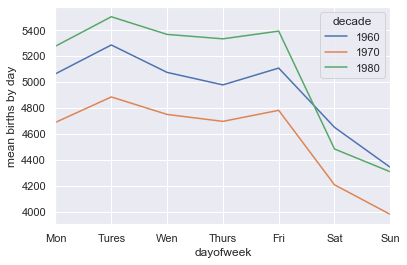

In [85]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tures', 'Wen', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

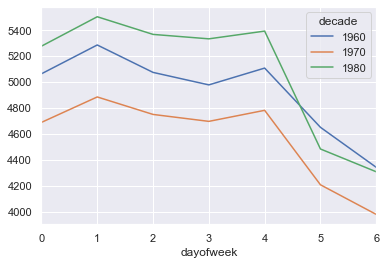

In [93]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca()

In [77]:
births

,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,3
1988-12-30,1988,12,30,F,5742,4
1988-12-30,1988,12,30,M,6095,4
1988-12-31,1988,12,31,F,4435,5
